<a href="https://colab.research.google.com/github/abhinavsagar/Breast-cancer-classification/blob/master/Breast_cancer_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading & Preprocessing

In [1]:
!git clone https://github.com/abhinavsagar/breast.git

Cloning into 'breast'...
fatal: helper error (-1): User cancelled dialog.
bash: /dev/tty: No such device or address
error: failed to execute prompt script (exit code 1)
fatal: could not read Username for 'https://github.com': No such file or directory


In [2]:
%cd breast

[WinError 2] The system cannot find the file specified: 'breast'
C:\Users\samya\Downloads\breast-cancer-classification-master\breast-cancer-classification-master


In [3]:
import json
import math
import os

import cv2
from PIL import Image
import numpy as np
from keras import layers
from keras.applications import ResNet50,MobileNet, DenseNet201, InceptionV3, NASNetLarge, InceptionResNetV2, NASNetMobile
from keras.callbacks import Callback, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, accuracy_score
import scipy
from tqdm import tqdm
import tensorflow as tf
from keras import backend as K
import gc
from functools import partial
from sklearn import metrics
from collections import Counter
import json
import itertools


%matplotlib inline

In [4]:
#Transfer 'jpg' images to an array IMG
def Dataset_loader(DIR, RESIZE, sigmaX=10):
    IMG = []
    read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))
    t=0
    for i in os.listdir(DIR):
        for j in os.listdir(DIR+"\\"+i):
            for k in os.listdir(DIR+"\\"+i+"\\"+j):
                for IMAGE_NAME in tqdm(os.listdir(DIR+"\\"+i+"\\"+j+"\\"+k)):
                    while(t<=2480):
                        a=os.path.join(DIR,i)
                        b=os.path.join(a,j)
                        c=os.path.join(b,k)
                        PATH = os.path.join(c,IMAGE_NAME)
                        print(PATH)
                        _, ftype = os.path.splitext(PATH)
                        if ftype == ".png":
                            img = read(PATH)
                            img = cv2.resize(img, (RESIZE,RESIZE))
                            IMG.append(np.array(img))
                            t=t+1

            
    return IMG
benign=np.array(Dataset_loader(r'C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB',224))
malign=np.array(Dataset_loader(r'C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB',224))


  0%|                                                                                           | 0/30 [00:00<?, ?it/s]

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_s

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_s

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_s

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_s

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_s

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_s

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_s

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_s

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_s

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_s

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_s

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_s

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_s

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_s

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_s

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_s

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_s

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_s

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_s

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_s

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_s

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_s

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_s

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_s

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_s

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_s

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_s

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_s

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_s

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_s

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_s

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_s

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_s

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_s

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_s

100%|██████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:00<?, ?it/s]


C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_


  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-109

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-109

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-109

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-109

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-109

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-109

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-109

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-109

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-109

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-109

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-109

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-109

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-109

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-109

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-109

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-109

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-109

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-109

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-109

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-109

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-109

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-109

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-109

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-109

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-109

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-109

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-109

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-109

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-109

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-109

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-109

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-109

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-109

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-109

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-109

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-109

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-109

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-109

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-109

C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-10926-100-001.png
C:\Users\samya\Downloads\BreaKHis_v1\histology_slides\breast\malignant\SOB\ductal_carcinoma\SOB_M_DC_14-10926\100X\SOB_M_DC-14-109

  0%|                                                                                           | 0/13 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<?, ?it/s]


In [5]:
benign.shape,malign.shape

((2481, 224, 224, 3), (2481, 224, 224, 3))

In [6]:
from sklearn.model_selection import train_test_split as tts
benign_train,benign_test,malign_train,malign_test=tts(benign,malign,random_state=20,test_size=0.1)

# Create Label

In [7]:
# Skin Cancer: Malignant vs. Benign
# Create labels
benign_train_label = np.zeros(len(benign_train))
malign_train_label = np.ones(len(malign_train))
benign_test_label = np.zeros(len(benign_test))
malign_test_label = np.ones(len(malign_test))

# Merge data 
X_train = np.concatenate((benign_train, malign_train), axis = 0)
Y_train = np.concatenate((benign_train_label, malign_train_label), axis = 0)
X_test = np.concatenate((benign_test, malign_test), axis = 0)
Y_test = np.concatenate((benign_test_label, malign_test_label), axis = 0)

# Shuffle train data
s = np.arange(X_train.shape[0])
np.random.shuffle(s)
X_train = X_train[s]
Y_train = Y_train[s]

# Shuffle test data
s = np.arange(X_test.shape[0])
np.random.shuffle(s)
X_test = X_test[s]
Y_test = Y_test[s]

# To categorical
Y_train = to_categorical(Y_train, num_classes= 2)
Y_test = to_categorical(Y_test, num_classes= 2)

# Train and Evalutation split

In [8]:
x_train, x_val, y_train, y_val = train_test_split(
    X_train, Y_train, 
    test_size=0.2, 
    random_state=11
)

# Display Some Images

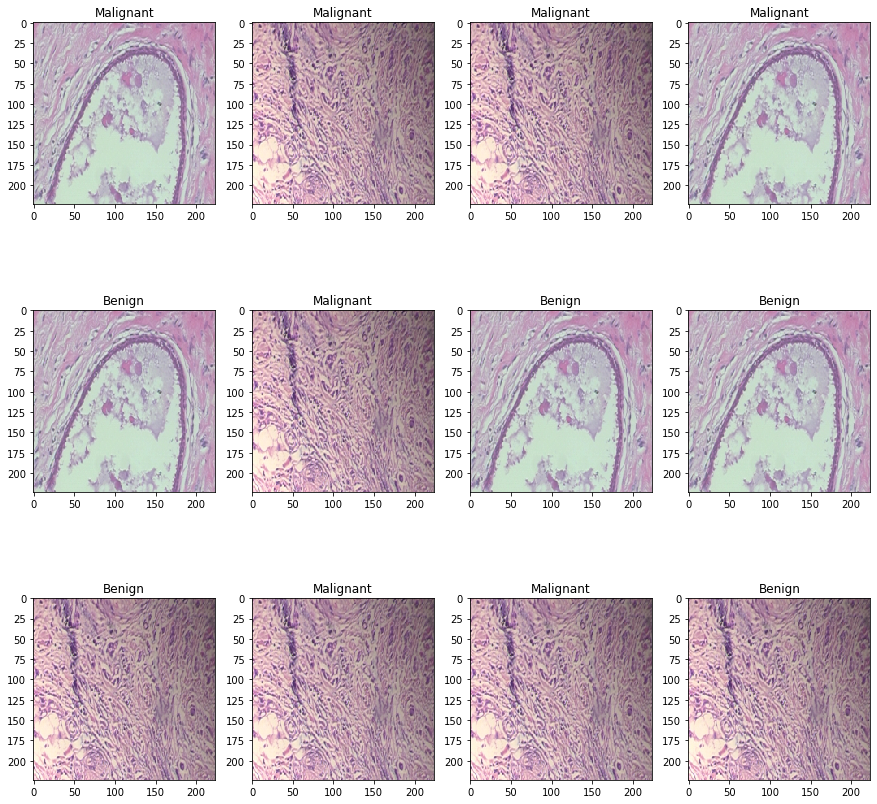

In [9]:

# # Display first 15 images of moles, and how they are classified
w=60
h=40
fig=plt.figure(figsize=(15, 15))
columns = 4
rows = 3

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if np.argmax(Y_train[i]) == 0:
        ax.title.set_text('Benign')
    else:
        ax.title.set_text('Malignant')
    plt.imshow(x_train[i], interpolation='nearest')
plt.show()

# Data Generator

In [10]:
BATCH_SIZE = 16

# Using original generator
train_generator = ImageDataGenerator(
        zoom_range=2,  # set range for random zoom
        rotation_range = 90,
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True,  # randomly flip images
    )

# Model: ResNet50

In [11]:
def build_model(backbone, lr=1e-4):
    model = Sequential()
    model.add(backbone)
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dropout(0.5))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(2, activation='softmax'))
    
    
    model.compile(
        loss='binary_crossentropy',
        optimizer=Adam(lr=lr),
        metrics=['accuracy']
    )
    
    return model

In [12]:
K.clear_session()
gc.collect()

resnet = DenseNet201(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)


 


model = build_model(resnet ,lr = 1e-4)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet201 (Functional)     (None, 7, 7, 1920)        18321984  
_________________________________________________________________
global_average_pooling2d (Gl (None, 1920)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1920)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1920)              7680      
_________________________________________________________________
dense (Dense)                (None, 2)                 3842      
Total params: 18,333,506
Trainable params: 18,100,610
Non-trainable params: 232,896
_________________________________________________________________


In [13]:
# Learning Rate Reducer
learn_control = ReduceLROnPlateau(monitor='val_acc', patience=5,
                                  verbose=1,factor=0.2, min_lr=1e-7)

# Checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

# Training & Evaluation

In [14]:
history = model.fit_generator(
    train_generator.flow(x_train, y_train, batch_size=BATCH_SIZE),
    steps_per_epoch=x_train.shape[0] / BATCH_SIZE,
    epochs=5,
    validation_data=(x_val, y_val),
    callbacks=[learn_control, checkpoint]
)

C:\Users\samya\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
223/223 [==============================] - 2415s 11s/step - loss: 0.1168 - accuracy: 0.9551 - val_loss: 2.6883e-04 - val_accuracy: 1.0000
Epoch 2/5
223/223 [==============================] - 2643s 12s/step - loss: 0.0105 - accuracy: 0.9978 - val_loss: 1.3145e-04 - val_accuracy: 1.0000
Epoch 3/5
223/223 [==============================] - 2752s 12s/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 1.2654e-05 - val_accuracy: 1.0000
Epoch 4/5
223/223 [==============================] - 2447s 11s/step - loss: 0.0046 - accuracy: 0.9988 - val_loss: 5.2439e-07 - val_accuracy: 1.0000
Epoch 5/5
223/223 [==============================] - 2329s 10s/step - loss: 0.0017 - accuracy: 0.9999 - val_loss: 0.0017 - val_accuracy: 1.0000


In [15]:
with open('history.json', 'w') as f:
    json.dump(str(history.history), f)

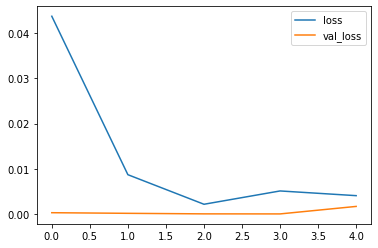

In [16]:
history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot()

# Prediction

In [17]:
Y_val_pred = model.predict(x_val)

In [18]:
accuracy_score(np.argmax(y_val, axis=1), np.argmax(Y_val_pred, axis=1))

1.0

In [19]:
Y_pred = model.predict(X_test)

In [20]:
tta_steps = 10
predictions = []

for i in tqdm(range(tta_steps)):
    preds = model.predict_generator(train_generator.flow(X_test, batch_size=BATCH_SIZE, shuffle=False),
                                    steps = len(X_test)/BATCH_SIZE)
    
    predictions.append(preds)
    gc.collect()
    
Y_pred_tta = np.mean(predictions, axis=0)

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]C:\Users\samya\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '
100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [09:12<00:00, 55.28s/it]


### Confusion Matrix

Confusion matrix, without normalization
[[249   0]
 [  0 249]]


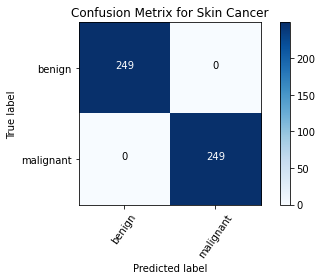

In [21]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=55)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cm = confusion_matrix(np.argmax(Y_test, axis=1), np.argmax(Y_pred, axis=1))

cm_plot_label =['benign', 'malignant']
plot_confusion_matrix(cm, cm_plot_label, title ='Confusion Metrix for Skin Cancer')

Confusion matrix, without normalization
[[249   0]
 [  0 249]]


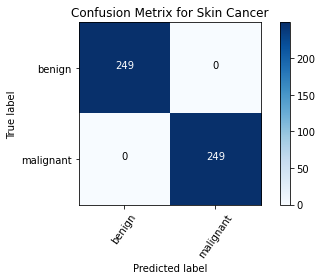

In [22]:
cm = confusion_matrix(np.argmax(Y_test, axis=1), np.argmax(Y_pred_tta, axis=1))

cm_plot_label =['benign', 'malignant']
plot_confusion_matrix(cm, cm_plot_label, title ='Confusion Metrix for Skin Cancer')

### Classification Report

In [23]:
from sklearn.metrics import classification_report
classification_report( np.argmax(Y_test, axis=1), np.argmax(Y_pred_tta, axis=1))

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       249\n           1       1.00      1.00      1.00       249\n\n    accuracy                           1.00       498\n   macro avg       1.00      1.00      1.00       498\nweighted avg       1.00      1.00      1.00       498\n'

### ROC and AUC

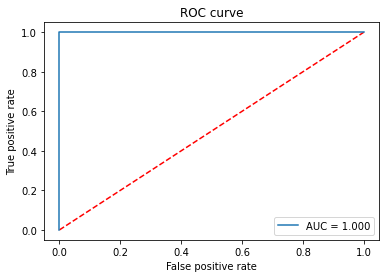

In [24]:
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import roc_curve
roc_log = roc_auc_score(np.argmax(Y_test, axis=1), np.argmax(Y_pred_tta, axis=1))
false_positive_rate, true_positive_rate, threshold = roc_curve(np.argmax(Y_test, axis=1), np.argmax(Y_pred_tta, axis=1))
area_under_curve = auc(false_positive_rate, true_positive_rate)

plt.plot([0, 1], [0, 1], 'r--')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = {:.3f}'.format(area_under_curve))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
#plt.savefig(ROC_PLOT_FILE, bbox_inches='tight')
plt.close()

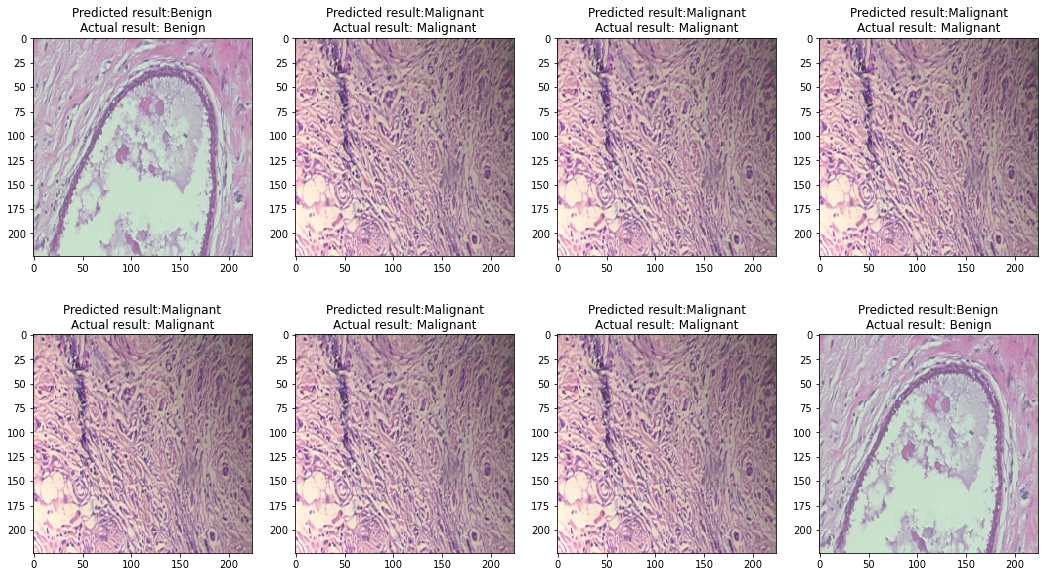

In [25]:
i=0
prop_class=[]
mis_class=[]

for i in range(len(Y_test)):
    if(np.argmax(Y_test[i])==np.argmax(Y_pred_tta[i])):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(Y_test)):
    if(not np.argmax(Y_test[i])==np.argmax(Y_pred_tta[i])):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

# # Display first 8 images of benign
w=60
h=40
fig=plt.figure(figsize=(18, 10))
columns = 4
rows = 2

def Transfername(namecode):
    if namecode==0:
        return "Benign"
    else:
        return "Malignant"
    
for i in range(len(prop_class)):
    ax = fig.add_subplot(rows, columns, i+1)
    ax.set_title("Predicted result:"+ Transfername(np.argmax(Y_pred_tta[prop_class[i]]))
                       +"\n"+"Actual result: "+ Transfername(np.argmax(Y_test[prop_class[i]])))
    plt.imshow(X_test[prop_class[i]], interpolation='nearest')
plt.show()